In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [4]:
#Load the data set 
Titanic_Data_path = "../Data/titanic_data.csv"
Titanic_Data = pd.read_csv(Titanic_Data_path)
Titanic_Data_copy = pd.read_csv(Titanic_Data_path)
Titanic_Data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
#Counting the missing values in every column
Missing_Values = Titanic_Data.isnull().sum()
Missing_Values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Calculating the percentage of null values
Total_Cells = np.product(Titanic_Data.shape)
Total_Missing_Cells = Missing_Values.sum()

(Total_Missing_Cells/Total_Cells) * 100

8.099513655069211

In [7]:
Titanic_Data["Sex"]=Titanic_Data["Sex"].replace(['female','male'],[0,1]) #replacing strings by numeric values to make sense
Titanic_Data["Age"].fillna(Titanic_Data.Age.median(),inplace=True) #replacing null values with the median
Titanic_Data["Embarked"].fillna(Titanic_Data.Embarked.mode()[0],inplace=True) #replacing null values with the mode
Titanic_Data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True) #drop columns that we don't need

In [8]:
#showing the impact of each char on the label column
Titanic_Data[["Embarked","Survived"]].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending =False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

In [9]:
#replacing strings with numeric values to make sense
Titanic_Data["Embarked"] = Titanic_Data["Embarked"].replace(['C','Q','S'],[0,1,2])
Titanic_Data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [10]:
#showing the correlation
Titanic_Data.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.339898  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.081163 -0.114631 -0.245489   
Age      -0.064910 -0.339898  0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081 -0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.096688  0.159651  0.216225   
Embarked -0.167675  0.162098  0.108262 -0.018754  0.068230  0.039798   

              Fare  Embarked  
Survived  0.257307 -0.167675  
Pclass   -0.549500  0.162098  
Sex      -0.182333  0.108262  
Age       0.096688 -0.018754  
SibSp     0.159651  0.068230  
Parch     0.216225  0.039798  
Fare      1.000000 -0.224719  
Embarked -0.224719  1.000000

In [11]:
#making test and training data sets
Y = Titanic_Data["Survived"]
X = Titanic_Data.drop(["Survived"],axis=1)
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(f"Train size {X_train.shape[0]} rows\nTest size {X_test.shape[0]} rows")

Train size 712 rows
Test size 179 rows


In [12]:
print("Shape of Y train: " + str(Y_train.shape))
print("Shape of Y test: " + str(Y_test.shape))

Shape of Y train: (712,)
Shape of Y test: (179,)


In [13]:
Y_train = Y_train.reshape(Y_train.shape[0],1)
Y_test = Y_test.reshape(Y_test.shape[0],1)

print("Shape of Y train: " + str(Y_train.shape))
print("Shape of Y test: " + str(Y_test.shape))

Shape of Y train: (712, 1)
Shape of Y test: (179, 1)


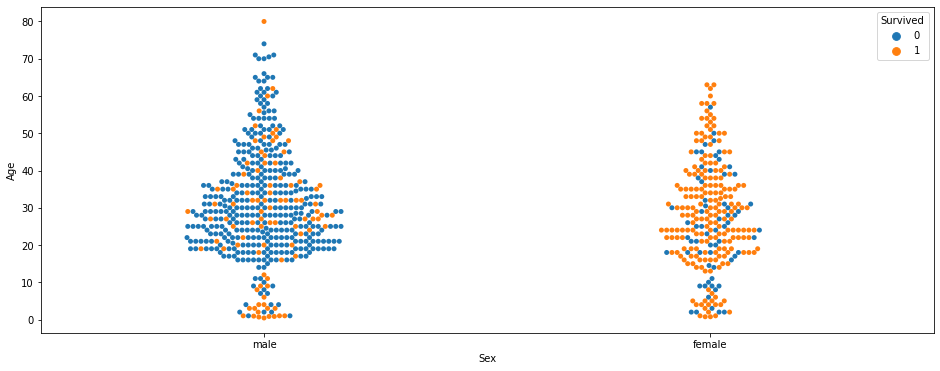

In [14]:
plt.figure(figsize=(16,6))
sns.swarmplot(x=Titanic_Data_copy['Sex'],y=Titanic_Data_copy['Age'],hue=Titanic_Data_copy['Survived'])
plt.show()

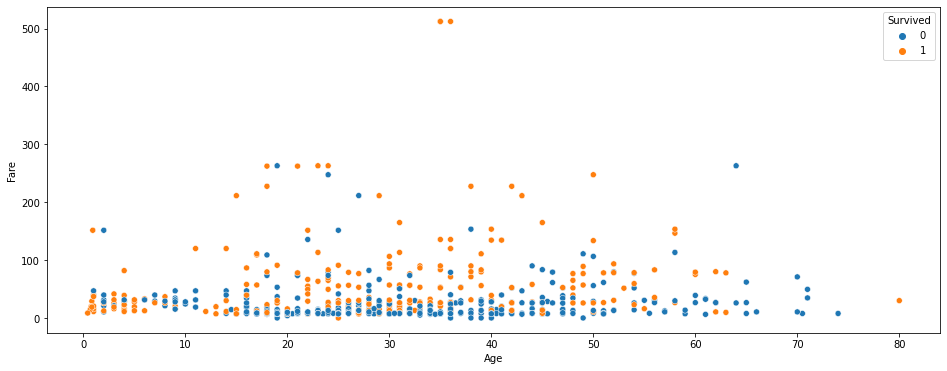

In [15]:
plt.figure(figsize=(16,6))
sns.scatterplot(x=Titanic_Data_copy['Age'],y=Titanic_Data_copy['Fare'],hue=Titanic_Data_copy['Survived'])
plt.show()

In [70]:
def intialize_parameters(dim):
    W = np.zeros(shape = (dim,1))
    b = 0
    parameters = {"W":W,
    "b":b}
    assert(W.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return parameters

In [71]:
parameters = intialize_parameters(7)
print("Initialization of parameter W : " + str(parameters["W"]))
print("Initialization of parameter b : " + str(parameters["b"]))



Initialization of parameter W : [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Initialization of parameter b : 0


In [72]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    return A

In [108]:
def propagate(X,W,b,Y):
    m = X.shape[0]
    Z = np.dot(X,W) +b  
    A = sigmoid(Z)
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A))) 

    dW = (1/m) * np.dot(X.T,(A-Y))
    db = (1/m) * np.sum((A-Y)) 

    grads = {"dW":dW
    ,"db" :db}
    assert(dW.shape == W.shape)
    assert(db.dtype == float)
    assert(Z.dtype == float)
    assert(cost.shape == ())
   
    return cost , grads

In [109]:
def optimization(X,W,b,Y,iterations,learning_rate,print_cost = False):
    costs = []

    for i in range(iterations):
        cost,grads = propagate(X,W,b,Y)

        dW = grads["dW"]
        db = grads["db"]

        W = W - learning_rate * dW
        b = b - learning_rate * db 

        costs.append(cost)

        if print_cost and i % 100 == 0:
            print("Cost after iteration %i : %f" %(i,cost))
        parameters = {"W":W,
        "b":b}
        grads = {"dW":dW,
        "db":db}    

        

        return parameters , grads , costs